# Los Angeles Crime Exploratory Analysis (2020 - 2023)

Los Angeles is a central and populous city of California, USA. In this notebook, I analyze the crime data from Jan 2020 to March 2023 released by the police department of the city (LAPD). The dataset and its explanation can be found on https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8.

*Quote from the website, last update March 01 2023:* <br>
*This dataset reflects incidents of crime in the City of Los Angeles dating back to 2020. This data is transcribed from original crime reports that are typed on paper and therefore there may be some inaccuracies within the data. Some location fields with missing data are noted as (0°, 0°). Address fields are only provided to the nearest hundred block in order to maintain privacy. This data is as accurate as the data in the database.*

![Crime Data Analysis](https://www.cpss.net/wp-content/uploads/images/accurate-orlando-crime-statistics.png)

Insights from this analysis can point out the most prevalent problems and the most vulnerable groups needing protection. 

Here is the outline of my analysis:
1. The Dataset: Load, clean, and convert to appropriate formats.
2. Exploratory Data Analysis: Visualize and infer meaningful insights from the data by answering the following topics.
 * Most problematic crimes: What are the main crimes?
 * Temporal trends in criminal activities: When do crime occur?
 * Crime Location: Where do crimes happen?
 * Victim's Characteristics: Who are the most vulnerable victims?
3. Conclusion & Future Ideas: Summarize the findings and suggest follow-up work.
4. Reference

Before analyzing, I install some libraries (besides the default ones) used in this notebook.

In [1]:
# !pip install  --upgrade --quiet
!pip install opendatasets folium plotly wordcloud --upgrade --quiet
# !pip install  --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 53.0 MB/s eta 0:00:00


## The Dataset

I used <code>opendatasets</code> to download the file.

In [2]:
# Load the library
import opendatasets as od

# Download the file
download_url = "https://data.lacity.org/api/views/2nrs-mtv8/rows.csv"
od.download(download_url)

178667520it [00:50, 3522462.80it/s]


* Load the file with panda
* See what the file contains
* Clean & Impute

In [3]:
import pandas as pd

In [4]:
# Path to the file
data_file = 'Crime_Data_from_2020_to_Present.csv'
# Load the file into pandas dataframe
crime = pd.read_csv(data_file, parse_dates=True)

The data is loaded into the object <code>crime</code>. First, we'll take a look at the data.

In [5]:
crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [6]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699280 entries, 0 to 699279
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           699280 non-null  int64  
 1   Date Rptd       699280 non-null  object 
 2   DATE OCC        699280 non-null  object 
 3   TIME OCC        699280 non-null  int64  
 4   AREA            699280 non-null  int64  
 5   AREA NAME       699280 non-null  object 
 6   Rpt Dist No     699280 non-null  int64  
 7   Part 1-2        699280 non-null  int64  
 8   Crm Cd          699280 non-null  int64  
 9   Crm Cd Desc     699280 non-null  object 
 10  Mocodes         603145 non-null  object 
 11  Vict Age        699280 non-null  int64  
 12  Vict Sex        607645 non-null  object 
 13  Vict Descent    607639 non-null  object 
 14  Premis Cd       699272 non-null  float64
 15  Premis Desc     698903 non-null  object 
 16  Weapon Used Cd  242897 non-null  float64
 17  Weapon Des

The data contains 600K+ crime incidents, with 28 attributes. While pandas classified many column as either <code>int</code> or <code>float</code>, only victim's age (<code>Vict Age</code>) is truly numeric here. Most of others are codes (containing <code>Cd</code> in their column's names) and should be treated as string instead. 

In [7]:
# Check statistics of numeric data
crime[["Vict Age", "TIME OCC", "LAT", "LON"]].describe()

,Vict Age,TIME OCC,LAT,LON
count,699280.000000,699280.000000,699280.000000,699280.000000
mean,29.962190,1333.939722,33.963174,-117.970426
std,21.695309,654.274266,1.939686,6.727204
min,-2.000000,1.000000,0.000000,-118.667600
25%,12.000000,900.000000,34.013200,-118.429400
50%,31.000000,1415.000000,34.058400,-118.321400
75%,45.000000,1900.000000,34.163100,-118.273900
max,120.000000,2359.000000,34.334300,0.000000


Although victim's age is the only numeric data, I also summarized the column <code>TIME OCC</code> (time of occurrence), <code>LAT</code>, and <code>LON</code> as it is possible to identify "impossible" data.

There are victim who are -2 and 120 years old, which might be entry errors. The range for time of occurrence is valid. Latitudes and longitudes, apart from the 0 corresponding to missing values, have narrow ranges, which is as expected. Thus, we only have to clean the data with suspicious victim's age at this stage

In [8]:
crime['Vict Age'].value_counts().sort_index()

-2           5
-1          38
 0      169726
 2         312
 3         358
         ...  
 96         66
 97         54
 98         51
 99        252
 120         1
Name: Vict Age, Length: 102, dtype: int64

There are 35 victims with the age of -2, -1, or 120. I will remove these entries as they are likely to be inaccurate data. There are cases where the victim age is 0, which may refer to situations when age of the victim is not identified.

In [9]:
crime = crime[crime['Vict Age'].isin([-2, -1, 120]) == False]

Finally, I parsed the column with dates into datetime format.

In [10]:
crime['Date Rptd'] = pd.to_datetime(crime['Date Rptd'])
crime['DATE OCC'] = pd.to_datetime(crime['DATE OCC'])

In [11]:
crime.isnull().sum().sort_values(ascending=False)

Crm Cd 4          699184
Crm Cd 3          697486
Crm Cd 2          647127
Cross Street      585815
Weapon Used Cd    456341
Weapon Desc       456341
Mocodes            96134
Vict Descent       91640
Vict Sex           91634
Premis Desc          377
Premis Cd              8
Crm Cd 1               8
LAT                    0
LOCATION               0
Status Desc            0
Status                 0
DR_NO                  0
Date Rptd              0
Vict Age               0
Crm Cd Desc            0
Crm Cd                 0
Part 1-2               0
Rpt Dist No            0
AREA NAME              0
AREA                   0
TIME OCC               0
DATE OCC               0
LON                    0
dtype: int64

There are 6 attributes containing substantially high number of null entry, but most of them are null for sensible reasons. <code>Crm Cd 2, 3, 4</code> are associated crime codes, so they will be null when only one crime is charged. Similar reasons apply for the 2 weapon-related attributes, as many crimes do not involve weapons.

Now the dataset is ready to be analyze

In [12]:
# Import visualization libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Most problematic crimes

In this section, I will identify the main crime in the city.

**Q1: On average, how many crimes are committed daily?**

In [13]:
# Duration
duration = (crime["DATE OCC"].max() - crime["DATE OCC"].min()).days

In [14]:
print("There are {} crimes commited over {} days. On average, there are {} crimes each day.".format(len(crime), duration, int(len(crime)/duration)))

There are 699236 crimes commited over 1195 days. On average, there are 585 crimes each day.


**Q2: Which crime is the most popular?**

Rank the crimes based on the number of incidences. I also divide number by the observed duration to estimate the average occurence daily.

In [15]:
crime_freq = crime["Crm Cd Desc"].value_counts()

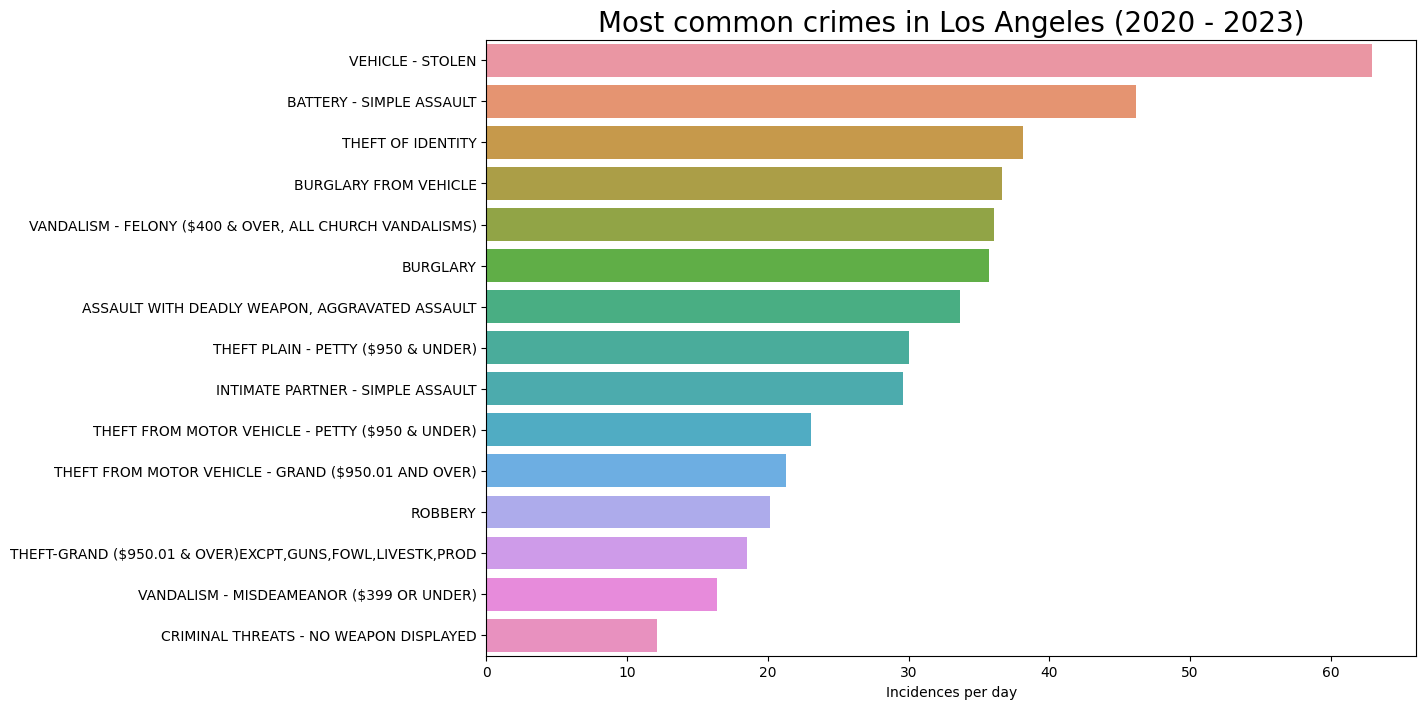

In [16]:
plt.rcParams["figure.figsize"] = (12, 8) # Set the default scale for the rest of the notebook
plt.rcParams['axes.titlesize'] = 20
sns.barplot(x = crime_freq.values[:15]/duration, y = crime_freq.index[:15])
plt.title("Most common crimes in Los Angeles (2020 - 2023)")
plt.xlabel("Incidences per day");

I calculate the proportion these common crimes account for to get an idea how "popular" they are.

In [17]:
crime_freq_df = crime_freq.to_frame().reset_index()
crime_freq_df.columns = ["Crm", "Count"]
crime_freq_df['Perc'] = crime_freq_df.Count/crime_freq_df.Count.sum()*100
crime_freq_df['CumPerc'] = crime_freq_df["Perc"].cumsum()

In [18]:
crime_freq_df[crime_freq_df.CumPerc < 70]

,Crm,Count,Perc,CumPerc
0,VEHICLE - STOLEN,75190,10.753165,10.753165
1,BATTERY - SIMPLE ASSAULT,55113,7.881888,18.635053
2,THEFT OF IDENTITY,45588,6.519687,25.154740
3,BURGLARY FROM VEHICLE,43736,6.254827,31.409567
4,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",43072,6.159866,37.569433
5,BURGLARY,42655,6.100229,43.669662
6,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",40172,5.745128,49.414790
7,THEFT PLAIN - PETTY ($950 & UNDER),35866,5.129313,54.544102
8,INTIMATE PARTNER - SIMPLE ASSAULT,35396,5.062096,59.606199
9,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),27567,3.942446,63.548645


There are 137 crime categories registered, but the top 11 make up more than 2/3 of all crimes in LA.

## Temporal Trends in Criminal Activities

**Q3: Is the number of crimes increasing?**

Over 2 years, we may expect to see a change in the number of incidences, either increase, decrease, or remain stable.

In [19]:
# Weekly occurence
crime['WeekPeriod'] = pd.DatetimeIndex(crime["DATE OCC"]).to_period('W').to_timestamp()
# Monthly occurence
crime['MonthPeriod'] = pd.DatetimeIndex(crime["DATE OCC"]).to_period('M').to_timestamp()

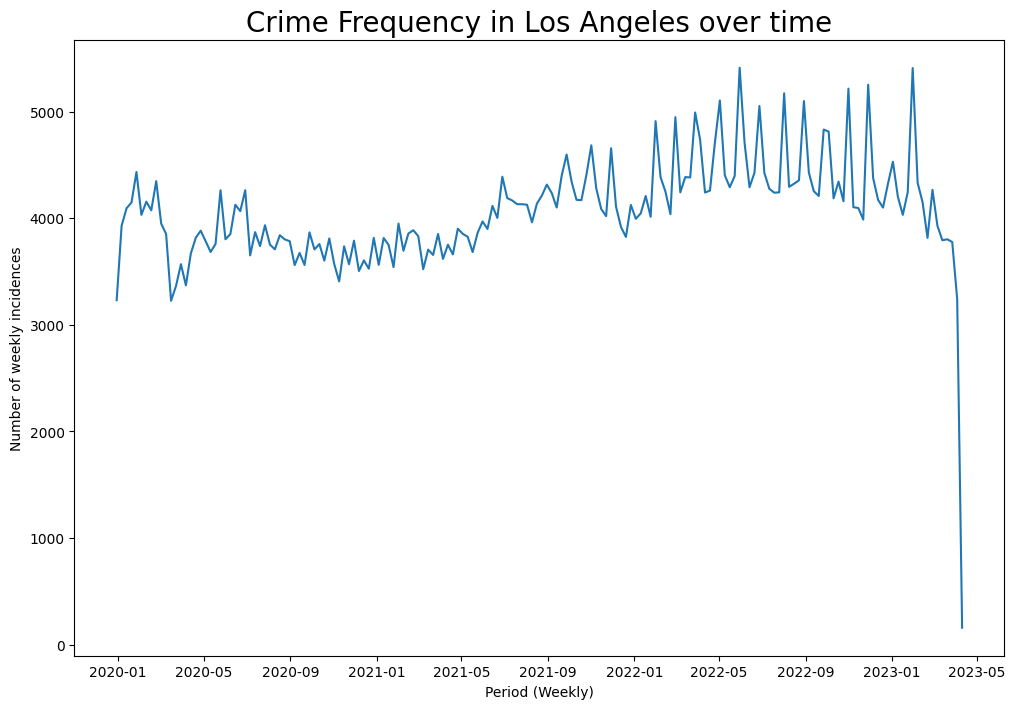

In [20]:
crime_time = crime.groupby("WeekPeriod").count().reset_index()[["WeekPeriod", "DR_NO"]]

plt.figure(figsize=(12,8))
sns.lineplot(x=crime_time.WeekPeriod, y=crime_time.DR_NO)
plt.title("Crime Frequency in Los Angeles over time")
plt.ylabel("Number of weekly incidences")
plt.xlabel("Period (Weekly)");

The drop in the last week of 2023 is likely due to unupdated data (that is the week of Feb 27th, 2023, but this data is last updated on March 1st, 2023, so there's only a 3-day window. Furthermore, many crimes in this window may have not been reported yet). Compared to early 2020, there seem to be slightly more crimes happening in late 2022.

I go on and check for the temporal change of each popular crimes. Based on the table above, I pick the top 7 crimes as they account for almost 50% of all crimes committed and are suitable for visualization.

In [21]:
# Name of the top 7 crimes
top_crime = crime_freq_df.iloc[:7,0]
top_crime_time = crime[crime['Crm Cd Desc'].isin(top_crime)]

Plot with a weekly period

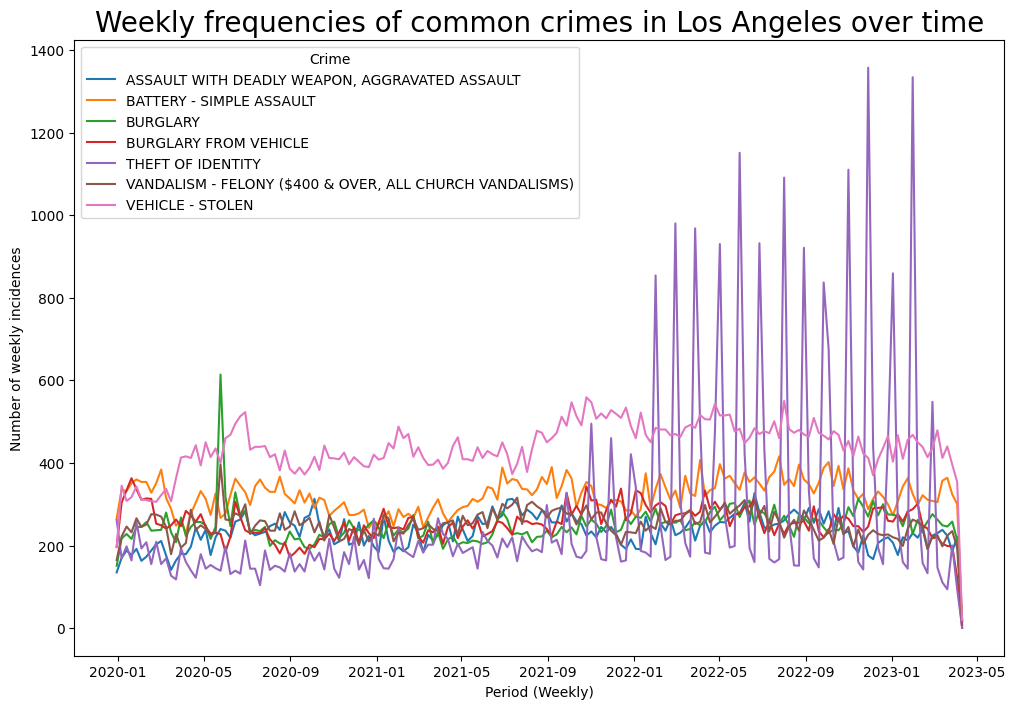

In [22]:
top_crime_time_week = top_crime_time.groupby(["WeekPeriod", "Crm Cd Desc"]).count().reset_index()[["WeekPeriod", "Crm Cd Desc", "DR_NO"]]

plt.figure(figsize=(12,8))
sns.lineplot(data=top_crime_time_week, x="WeekPeriod", y = "DR_NO", hue = 'Crm Cd Desc')
plt.title("Weekly frequencies of common crimes in Los Angeles over time")
plt.ylabel("Number of weekly incidences")
plt.xlabel("Period (Weekly)")
plt.legend(title = "Crime");

Plot with a monthly period

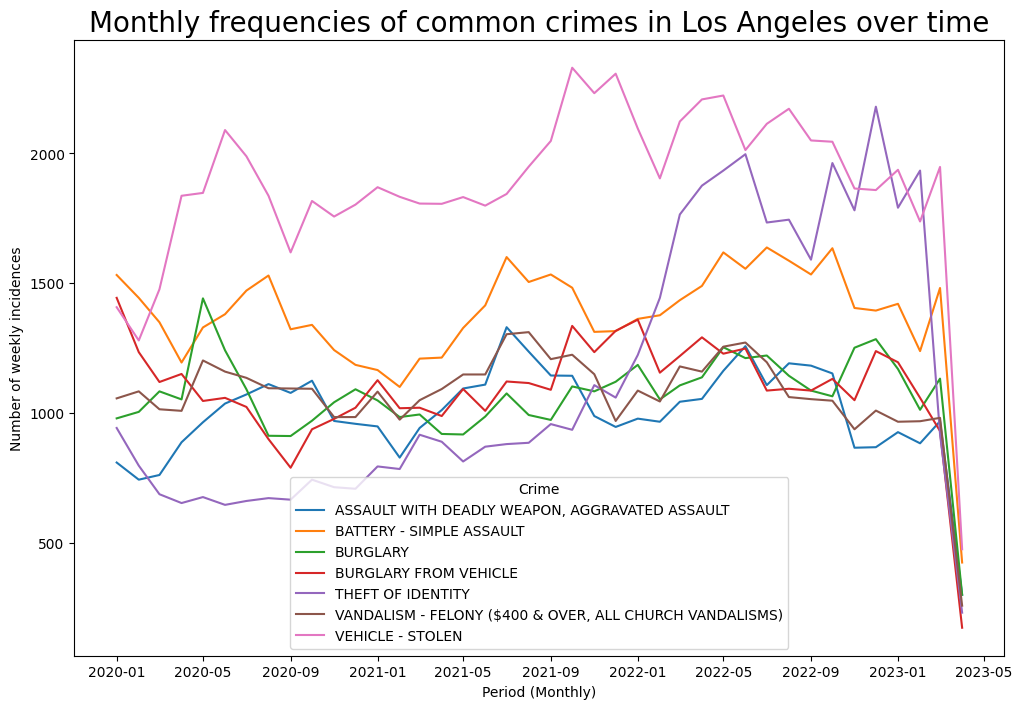

In [23]:
top_crime_time_month = top_crime_time.groupby(["MonthPeriod", "Crm Cd Desc"]).count().reset_index()[["MonthPeriod", "Crm Cd Desc", "DR_NO"]]

plt.figure(figsize=(12,8))
sns.lineplot(data=top_crime_time_month, x="MonthPeriod", y = "DR_NO", hue = 'Crm Cd Desc')
plt.title("Monthly frequencies of common crimes in Los Angeles over time")
plt.ylabel("Number of weekly incidences")
plt.xlabel("Period (Monthly)")
plt.legend(title = "Crime");

Stealing vehicle remains the most common crime of all time. However, there is a steep increase of identity theft within the last year, with a striking fluctuating pattern (one possibility is that the peaks co-occur with the payment week). This is a sign that more warnings regarding protecting personal information should be given out to LA residents.

**Q4: When are crimes more likely to happen?**

In [24]:
crime['TimeSlot'] = pd.cut(x=crime["TIME OCC"],
    bins=[0, 159, 359, 559, 759, 959, 1159, 1359, 1559, 1759, 1959, 2159, 2359],
    labels=['0-2','2-4','4-6','6-8','8-10','10-12','12-14', '14-16', '16-18','18-20','20-22','22-24'])

<ipython-input-29-ed4688492b84>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  crime_hour_table = crime_hour.pivot("TimeSlot", 'MonthPeriod', 'DR_NO')


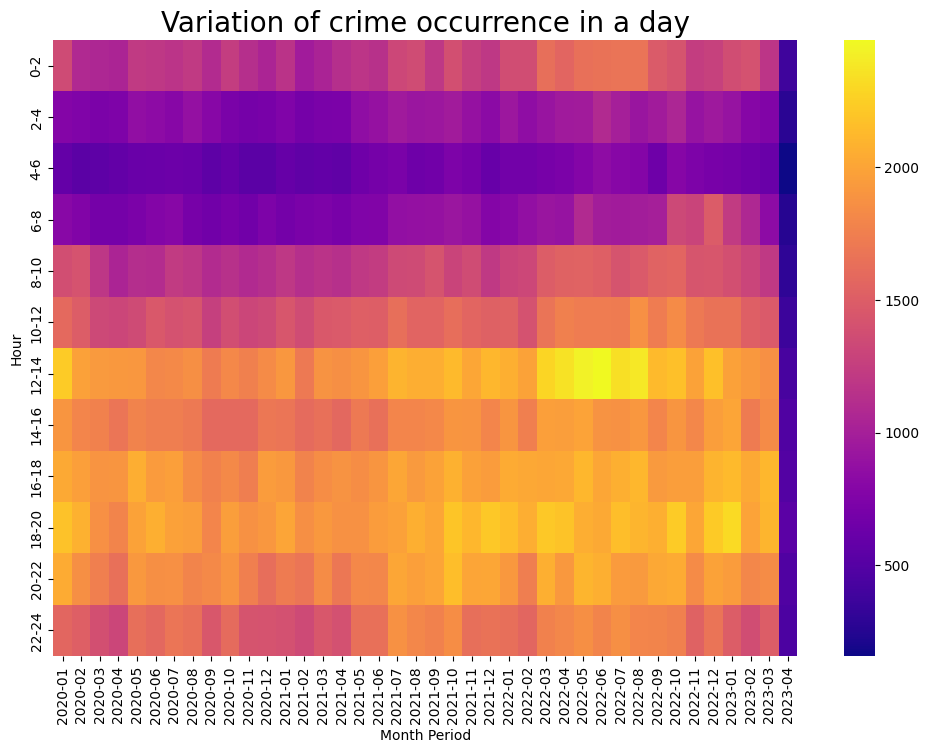

In [29]:
crime_hour = crime.groupby(['TimeSlot', 'MonthPeriod'])['DR_NO'].size().reset_index()
crime_hour_table = crime_hour.pivot("TimeSlot", 'MonthPeriod', 'DR_NO')
sns.heatmap(crime_hour_table, cmap = "plasma")
plt.title("Variation of crime occurrence in a day")
plt.xticks(np.arange(0.5, 40, 1),labels = crime_hour_table.columns.to_period('M'))
plt.xlabel("Month Period")
plt.ylabel("Hour");

Crimes are least likely to occur between 4-6am in the morning, and most likely to happen between 12-14pm and 18-20pm.

**Q5: How long do people wait before report the crime?**

In [27]:
crime['delay'] = (crime['Date Rptd'] - crime['DATE OCC']).dt.days

In [28]:
crime['delay_cat'] = pd.cut(
    x=crime["delay"],
    bins=[-1, 0, 1, 2, 7, 30, 365, np.inf],
    labels=["Same day","1 day","2 days",'3-7 days','8-30 days','1 month-1 year','More than 1 year'])

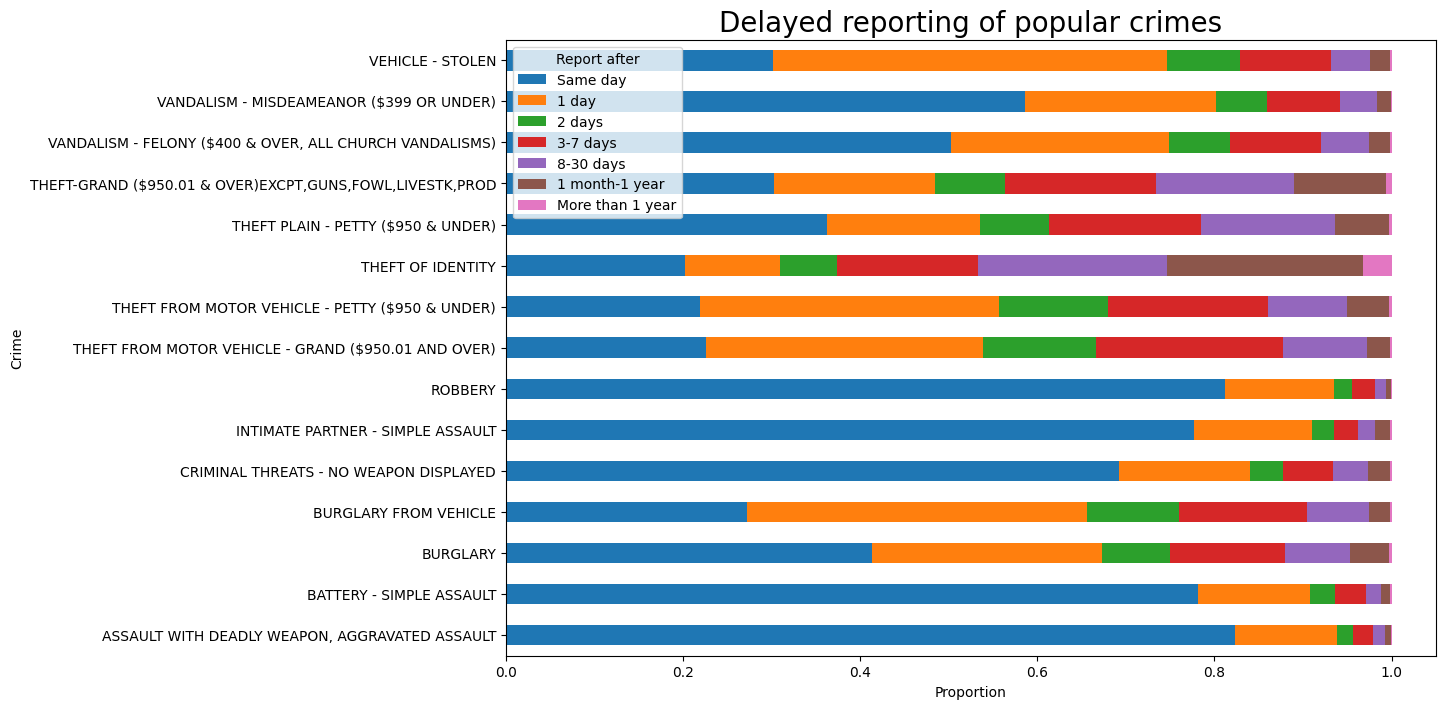

In [31]:
top_crime = crime_freq_df.iloc[:15,0]
top_crime_delay = crime[crime['Crm Cd Desc'].isin(top_crime)].groupby("Crm Cd Desc")['delay_cat'].value_counts(normalize=True).unstack()

top_crime_delay.plot.barh(stacked = True)
plt.title('Delayed reporting of popular crimes')
plt.ylabel('Crime')
plt.xlabel('Proportion')
plt.legend(title = "Report after");

Most of the common crimes are reported within one day of the incident. Assault, vandalism, robbery, and stolen vehicles are reported very timely. However, burglary and theft are generally reported later, which may reflect the nature of those crimes that the victims may not notice them right away. Notably, theft of identity - the crime rising in popularity - also has the longest delay of report.

## Crime Location

**Q6: In which region do the crimes happen more often?**

In [32]:
import folium
from folium.plugins import HeatMap

In [33]:
# Exclude entries without location information
valid_lat_lon = crime[(crime['LAT'] != 0) & (crime['LON'] != 0)]
# Take a sample of 0.1% all entries
sample_df = valid_lat_lon.sample(int(0.001 * len(valid_lat_lon)))
lat_lon_pairs = list(zip(list(sample_df.LAT), list(sample_df.LON)))

In [34]:
map_la = folium.Map(location = [34.0522, -118.2437], zoom_start = 9.5)
HeatMap(lat_lon_pairs).add_to(map_la)
map_la

From the leaflet map, we can see that crimes are spread almost all over the city. 

The city is divided into 21 areas. We can count the number of incidences in each area.

In [35]:
import plotly.express as px

In [37]:
valid_lat_lon['area_count'] = valid_lat_lon.groupby('AREA')['DR_NO'].transform('count')
fig = px.scatter(data_frame = valid_lat_lon.sample(int(0.01 * len(valid_lat_lon))), 
                 x='LON', y='LAT', color_continuous_scale = "viridis", 
                 color = "area_count", hover_data = ["AREA NAME"], 
                 labels={"LAT":"Latitude", "LON":"Longitude", "area_count":"Incidences"}, 
                 title = "Areas and their number of crime incidents")
fig.update_layout(width = 600, height = 700, title={'x': 0.5, 'xanchor': 'center'})
fig.update_yaxes(scaleanchor="x", scaleratio=1,)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=0.5,
                                        color='aliceblue')),
                  selector=dict(mode='markers'))
fig.show()

<ipython-input-37-eabd70a352ba>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Among the 21 areas, Central and 77th Street are where most crimes occur. In contrast, Foothill and Hollenbeck are relatively safer.

**Q7: In which buildings/vehicles do crime often happen?**

In [38]:
from wordcloud import WordCloud

In [39]:
premis_occurred = crime['Premis Desc'].value_counts().head(200)
# Create a dictionary
premis_dict = {}
for i in range(len(premis_occurred)):
    a = premis_occurred.index[i]
    x = premis_occurred.values[i]
    premis_dict[a] = x

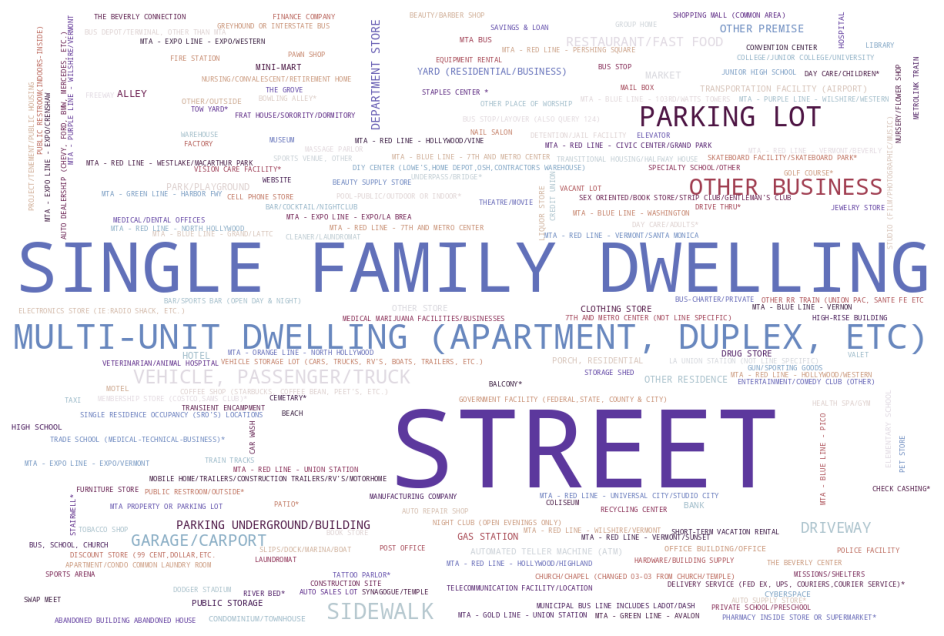

In [40]:
wordcloud = WordCloud(width=1200,
        height=800,
        random_state=15,
        background_color="white",
        colormap="twilight_shifted",
        collocations=False).generate_from_frequencies(premis_dict)

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Crimes can happen everywhere, including public spaces like the street, sidewalk, parking lot and more private places like residential buildings (multi-unit or single family dwellings).

## Victims' Characteristics

**Q8: Which age and gender are the most vulnerable groups?**

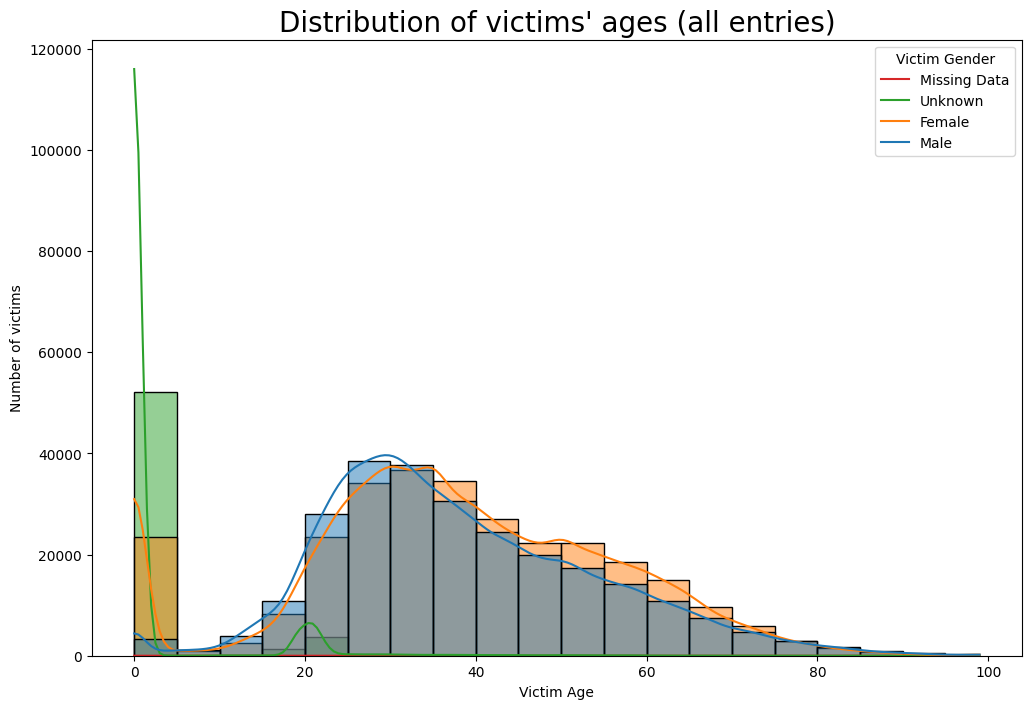

In [41]:
plt.figure(figsize=(12,8))
sns.histplot(data = crime, x = 'Vict Age', hue = 'Vict Sex', bins = np.arange(0,100,5), kde = True)
plt.title("Distribution of victims' ages (all entries)")
plt.xlabel("Victim Age")
plt.ylabel('Number of victims')
plt.legend(['Missing Data', 'Unknown', 'Female', 'Male'], title = "Victim Gender");

Looking at the histogram, it appears that most the victim are 0 year old. As I speculated earlier, it is possible that 0 is filled when the victim doesn't give his/her age to the record. It is supported by the high notion of unknown gender (probably the victim remains anonymous, or the victim is not human - such as vandalism), and a higher number of females than males (women are is less likely to share their age than men in general). Thus, I exclude all records with age equal 0 from the histogram.

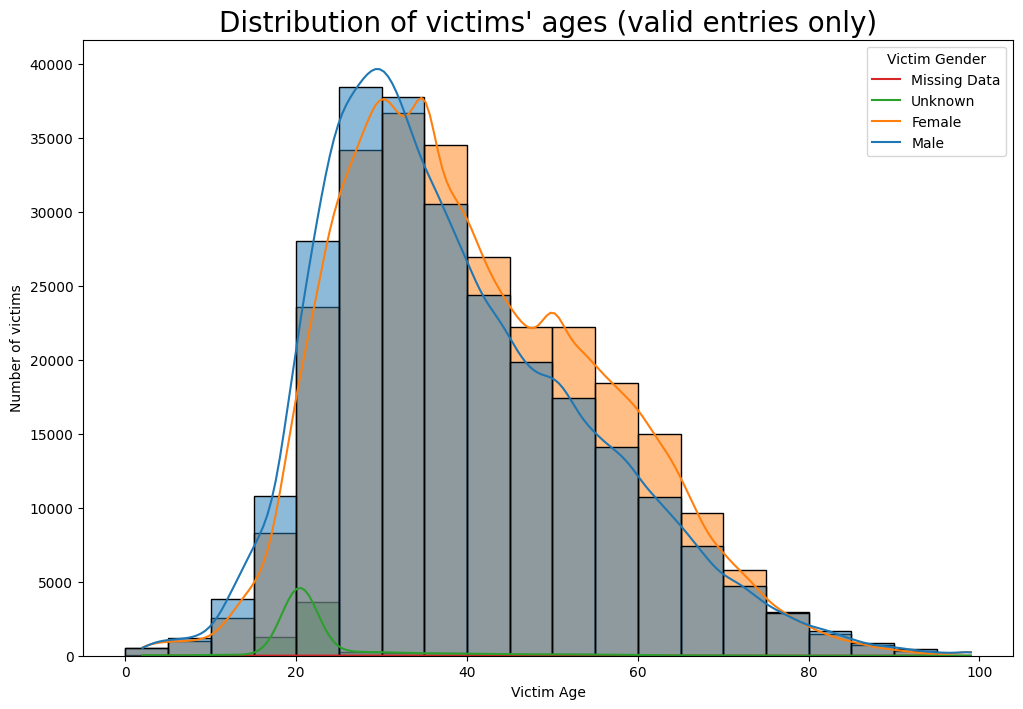

In [42]:
plt.figure(figsize=(12,8))
sns.histplot(data = crime[crime['Vict Age'] != 0], x = 'Vict Age', hue = 'Vict Sex', bins = np.arange(0,100,5), kde = True)
plt.title("Distribution of victims' ages (valid entries only)")
plt.xlabel("Victim Age")
plt.ylabel('Number of victims')
plt.legend(['Missing Data', 'Unknown', 'Female', 'Male'], title = "Victim Gender");

After exclusion, the histogram shows few discrimination between men and women. If we assume that the gender ratio is about 1 in this city, both genders are equally likely to be harmed. 

Most victims are between 20 and 40 years old, but it may not accurately reflect the vulnerability as there can simply be more people of this age in the city. If we assume a stable population dynamic in this city (the difference between age groups aren't very large), this data may point towards adult as the main victims. However, we should also consider that crimes involving children and elders tend to be underreported.

**Q9: Which races are targeted more?**

From the information of victim descent, I group them into 7 ethnic groups (Hispanic, Caucasian, Black, Asian, Pacific Islander, Other, and Unknown)

In [43]:
crime['Ethnic'] = crime['Vict Descent'].transform(lambda x: 
                                "Hispanic" if x=="H" 
                                else "Caucasian" if x=="W" 
                                else "Black" if x == "B" 
                                else "Unknown" if x=="X" 
                                else "Other" if x=="O" 
                                else "Pacific Islander" if x in ["G", "I", "P", "S", "U"] 
                                else "Asian")

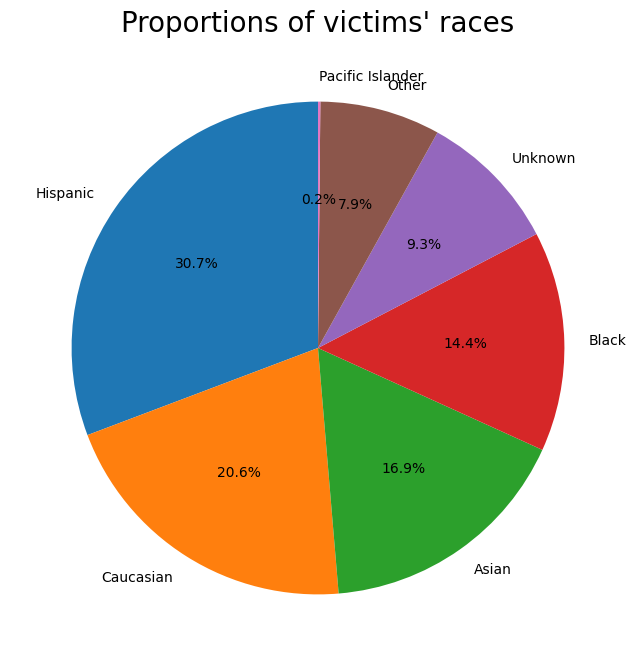

In [44]:
crime['Ethnic'].value_counts().plot(kind = "pie", autopct='%1.1f%%', startangle=90)
plt.title("Proportions of victims' races")
plt.axis("off");

From the number of victims, we may conclude that Hispanic people are being targeted the most, followed by Caucasian, then Asians, then Black people. However, to check for vulnerability, we must consider the distribution of races in the city, and it is impossible to conclude that within the given data.

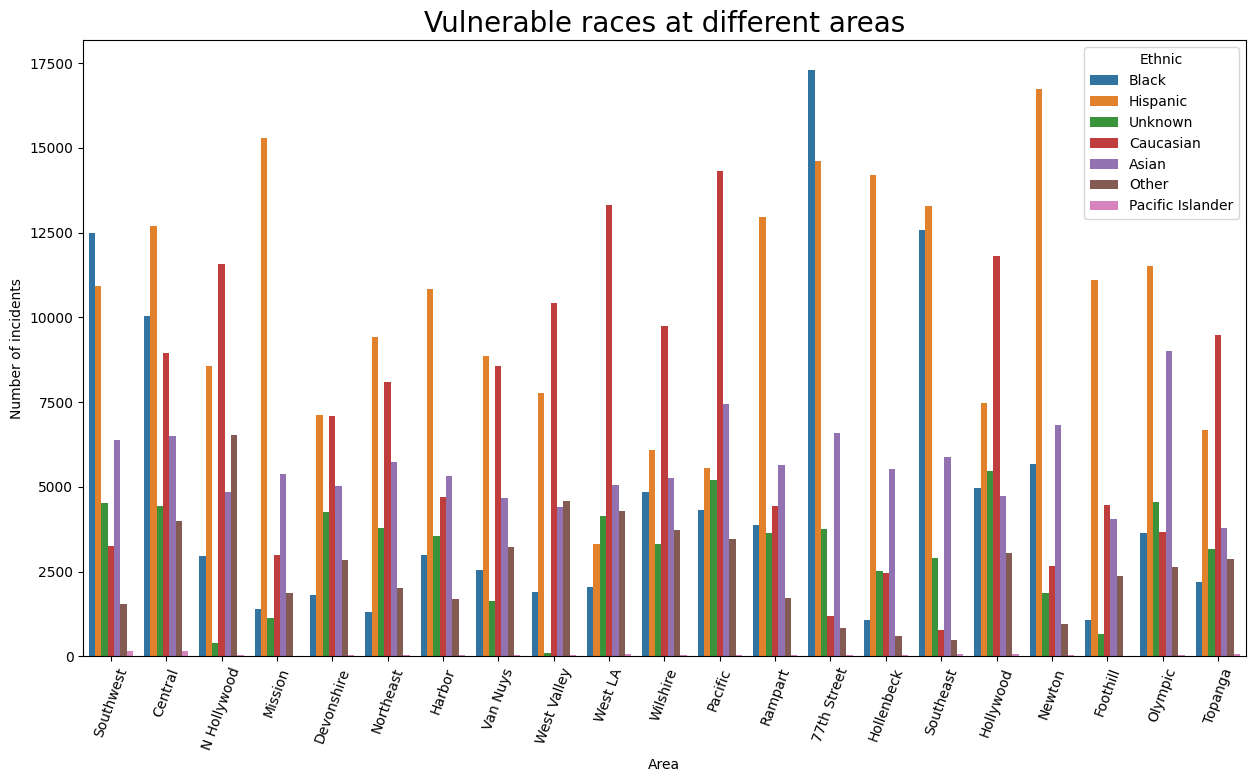

In [45]:
plt.figure(figsize=(15,8))
sns.countplot(data = crime, x = "AREA NAME", hue = "Ethnic")
plt.xticks(rotation=70)
plt.title("Vulnerable races at different areas")
plt.ylabel("Number of incidents")
plt.xlabel("Area");

The races of victims differ across areas. Latinos and Latinas are the main victims in the city, but they should be extra careful in Mission and Newton. Black people are much more likely to be targeted in 77th Street and Southwest, and Asians have higher risk in Olympic.

## Summary

In this notebook, I have analyzed the data about crime in Los Angeles from Jan 2020 to March 2023. Here are a few insights:

* The crime rate is high in the city and it is increasing.
* The 3 most common crimes are vehicle stealing, simple assault and identity thief. Identity thief is quickly become more popular and should be dealt with urgently.
* Burglary and theft are relatively slowly noticed, leading to a delay between the time of occurrence and reported time.
* Crimes can happen anywhere, either in public or private places. Some areas (such as Central, 77th Street) are riskier than others, but no where in the city is safe.
* Both genders are equally at risk. Most reported victims are adults aging from 20 to 40.
* Some areas may be riskier than others depending on the races.

## Ideas for Future Work

* Measure the severity of the crime. The impact of each crime is different and it is not shown in the current analysis, which only consider the frequency.
* Incorporate demographic distribution to identify vulnerability.
* Analyze the Status of each crime, taking in to account the reported date to see which crime is "harder" to solve.

## References

* https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8
* https://jovian.com/learn/zero-to-data-analyst-bootcamp/lesson/exploratory-data-analysis-case-study